<a href="https://colab.research.google.com/github/charles-pyj/EECS545Project/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import os

# Path to the mounted Google Drive
drive_path = '/content/drive/MyDrive/442_final_project'

# List directories and files in the drive_path
contents = os.listdir(drive_path)
print(contents)

Mounted at /content/drive/
['matting_human_half.zip', 'projectfile', 'pretrained-backbones-unet']


In [3]:
!pip install timm
!cd drive/MyDrive/442_final_project/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [49]:
os.chdir("/content/drive/MyDrive/442_final_project/pretrained-backbones-unet/pretrained-backbones-unet")
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), 428 bytes | 4.00 KiB/s, done.
From https://github.com/charles-pyj/pretrained-backbones-unet
   2c93223..dfecc2b  main       -> origin/main
Updating 2c93223..dfecc2b
Fast-forward
 backbones_unet/utils/dataset.py | 2 ++
 1 file changed, 2 insertions(+)


In [50]:
import backbones_unet

print(backbones_unet.__available_models__)
from backbones_unet.model.unet import Unet
from backbones_unet.utils.dataset import SemanticSegmentationDataset
from backbones_unet.model.losses import DiceLoss
from backbones_unet.utils.trainer import Trainer
from torchsummary import summary
import torch
import torch.nn as nn
import timm
import torch
from torch.utils.data import DataLoader  # Import the DataLoader
from torchvision import transforms

['convnext_atto', 'convnext_atto_ols', 'convnext_base', 'convnext_base_384_in22ft1k', 'convnext_base_in22ft1k', 'convnext_base_in22k', 'convnext_femto', 'convnext_femto_ols', 'convnext_large', 'convnext_large_384_in22ft1k', 'convnext_large_in22ft1k', 'convnext_large_in22k', 'convnext_nano', 'convnext_nano_ols', 'convnext_pico', 'convnext_pico_ols', 'convnext_small', 'convnext_small_384_in22ft1k', 'convnext_small_in22ft1k', 'convnext_small_in22k', 'convnext_tiny', 'convnext_tiny_384_in22ft1k', 'convnext_tiny_hnf', 'convnext_tiny_in22ft1k', 'convnext_tiny_in22k', 'convnext_xlarge_384_in22ft1k', 'convnext_xlarge_in22ft1k', 'convnext_xlarge_in22k', 'cs3darknet_focus_l', 'cs3darknet_focus_m', 'cs3darknet_l', 'cs3darknet_m', 'cs3darknet_x', 'cs3edgenet_x', 'cs3se_edgenet_x', 'cs3sedarknet_l', 'cs3sedarknet_x', 'cspdarknet53', 'cspresnet50', 'cspresnext50', 'darknet53', 'darknetaa53', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'densenetblur121d', 'dm_nfnet_f0', 'dm_nfnet_f1',

In [51]:
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1rTGzQocPAAP-c-pQcSRJqBY63iss0t14/442_final_project/pretrained-backbones-unet/pretrained-backbones-unet


In [52]:
print(timm.list_models())

['bat_resnext26ts', 'beit_base_patch16_224', 'beit_base_patch16_384', 'beit_large_patch16_224', 'beit_large_patch16_384', 'beit_large_patch16_512', 'beitv2_base_patch16_224', 'beitv2_large_patch16_224', 'botnet26t_256', 'botnet50ts_256', 'caformer_b36', 'caformer_m36', 'caformer_s18', 'caformer_s36', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_medium', 'coat_lite_medium_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_small', 'coat_tiny', 'coatnet_0_224', 'coatnet_0_rw_224', 'coatnet_1_224', 'coatnet_1_rw_224', 'coatnet_2_224', 'coatnet_2_rw_224', 'coatnet_3_224', 'coatnet_3_rw_224', 'coatnet_4_224', 'coatnet_5_224', 'coatnet_bn_0_rw_224', 'coatnet_nano_cc_224', 'coatnet_nano_rw_224', 'coatnet_pico_rw_224', 'coatnet_rmlp_0_rw_224', 'coatnet_rmlp_1_rw2_224', 'coatnet_rmlp_1_rw_224', 'coatnet_rmlp_2_rw_224', 'coatnet_rmlp_2

In [53]:
model = Unet(
    backbone='convnext_base', # backbone network name
    in_channels=3,            # input channels (1 for gray-scale images, 3 for RGB, etc.)
    num_classes=1,            # output channels (number of classes in your dataset)
)

In [54]:
print(sum(s.numel() for s in model.parameters()))

92651345


In [55]:
model2 = timm.create_model('convnext_base', pretrained=True)
print(model2.default_cfg)

{'url': 'https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_1k_224.pth', 'hf_hub_id': 'timm/convnext_base.fb_in22k_ft_in1k', 'architecture': 'convnext_base', 'tag': 'fb_in22k_ft_in1k', 'custom_load': False, 'input_size': (3, 224, 224), 'test_input_size': (3, 288, 288), 'fixed_input_size': False, 'interpolation': 'bicubic', 'crop_pct': 0.875, 'test_crop_pct': 1.0, 'crop_mode': 'center', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'num_classes': 1000, 'pool_size': (7, 7), 'first_conv': 'stem.0', 'classifier': 'head.fc'}


In [56]:
!nvidia-smi

Sun Apr 21 04:59:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |   1045MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [57]:
os.chdir("/content/drive/MyDrive/442_final_project/")
from backbones_unet.model.unet import Unet
from backbones_unet.utils.dataset import SemanticSegmentationDataset
from backbones_unet.model.losses import DiceLoss
from backbones_unet.utils.trainer import Trainer
transform = transforms.Compose([
    transforms.Resize((224,224)) # Resize/Scale the image       # Convert the image to a tenso # Normalize it as per ImageNet's distribution
])
train_img_path = '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944'
train_mask_path = '/content/drive/MyDrive/442_final_project/projectfile/matting/1803241944'
print(os.listdir(train_mask_path))
val_img_path = '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803251920'
val_mask_path = '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803251920'
train_dataset = SemanticSegmentationDataset(train_img_path, train_mask_path,normalize=transform)
val_dataset = SemanticSegmentationDataset(val_img_path, val_mask_path,normalize=transform)
train_loader = DataLoader(train_dataset, batch_size=2)
val_loader = DataLoader(val_dataset, batch_size=2)
print(train_dataset.img_paths)
print(train_dataset.mask_paths)
print(val_dataset.img_paths)
print(val_dataset.mask_paths)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(params, 1e-4)

trainer = Trainer(
    model,                    # UNet model with pretrained backbone
    criterion=DiceLoss(),     # loss function for model convergence
    optimizer=optimizer,      # optimizer for regularization
    epochs=10                 # number of epochs for model training
)


['matting_00000000']
['/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000001.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000002.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000006.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000007.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000012.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000017.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000019.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803241944/clip_00000000/1803241944-00000027.jpg', '/content/drive/MyDrive/442_final_project/projectfile/clip_img/180

torch.Size([2, 3, 224, 224])
torch.Size([2, 1, 256, 256, 4])
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.uint8)


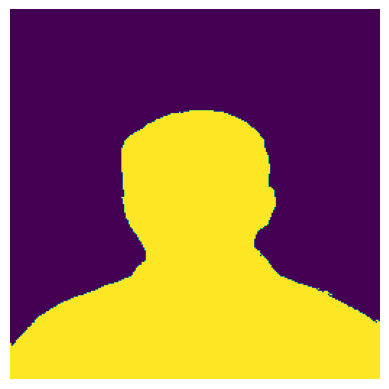

In [58]:
import matplotlib.pyplot as plt
import numpy as np
for i, (inputs, labels) in enumerate(train_loader):
        # Your training process, e.g., forward pass, backward pass, optimize, etc.
        print(inputs.shape)
        print(labels.shape)
        print(labels[0,0,:,:,3])
        outputs = model.predict(inputs.to('cuda'))
        image = labels[0,0,:,:,3]
# Ensure it's suitable for display: clip values to be within the interval [0, 1]

# Display the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()
        break

In [ ]:
trainer.fit(train_loader, val_loader)

In [ ]:
from backbones_unet.model.unet import Unet
import torch
from backbones_unet.utils.reproducibility import set_seed
from backbones_unet.utils.dataset import SemanticSegmentationDataset
from backbones_unet.model.losses import DiceLoss
from backbones_unet.utils.trainer import Trainer

# set_seed()

random_tensor = torch.rand((1, 3, 64, 64))

model = Unet(in_channels=3, num_classes=2)

print(model.predict(random_tensor))